Load and Explore the Dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display basic info and check for missing values
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values Before Cleaning:\n")
print(df.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

Handle missing value and clean data

In [5]:
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values after conversion
print("Missing Values After Conversion:\n")
print(df.isnull().sum())

# Fill missing TotalCharges values with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop irrelevant columns
df.drop(columns=['customerID'], inplace=True)

print("\nDataset Info After Cleaning:\n")
print(df.info())


Missing Values After Conversion:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset Info After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7

<ipython-input-5-9641623b4a74>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Encode Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Initialize dictionary to store label encoders
label_encoders = {}

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future use

print("Categorical columns encoded successfully!")
print(df.head())


Categorical columns encoded successfully!
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0       

Feature Scaling and Engineering

In [7]:
from sklearn.preprocessing import StandardScaler

# Step 1: Scale Numerical Columns
scaler = StandardScaler()

# Define numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical columns scaled successfully!")

# Step 2: Create Tenure Groups
import numpy as np

# Revert scaled 'tenure' to its original range for binning
df['tenure_original'] = df['tenure'] * scaler.scale_[0] + scaler.mean_[0]
df['tenure_original'] = df['tenure_original'].clip(lower=0)  # No negative values

# Create dynamic bins and labels
bins = [0, 12, 24, 48, 60, df['tenure_original'].max() + 1]
labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5+ Years']

# Bin tenure and create tenure groups
df['tenure_group'] = pd.cut(df['tenure_original'], bins=bins, labels=labels)

# One-hot encode tenure groups
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

# Drop temporary 'tenure_original' column
df.drop(columns=['tenure_original'], inplace=True)

print("Tenure categories created and one-hot encoded successfully!")
print(df.head())


Numerical columns scaled successfully!
Tenure categories created and one-hot encoded successfully!
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   Contract  PaperlessBilling

Split Dataset and Train Model


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Accuracy Score: 0.7714691270404542


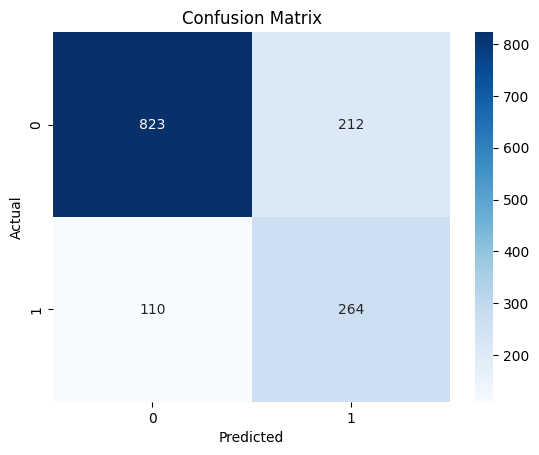

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split the data
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Train a Random Forest model
model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,      # Tree depth to avoid overfitting
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)

# Classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Improvement: Handle Class Imbalance with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before Resampling: {y_train.value_counts()}")
print(f"After Resampling: {pd.Series(y_train_resampled).value_counts()}")

# Train the model again with resampled data
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the original test set
y_pred_resampled = model.predict(X_test)

print("Classification Report After Resampling:\n", classification_report(y_test, y_pred_resampled))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Before Resampling: Churn
0    4139
1    1495
Name: count, dtype: int64
After Resampling: Churn
0    4139
1    4139
Name: count, dtype: int64
Classification Report After Resampling:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



Tune Hyperparameters

In [10]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Focus on F1 score to balance precision and recall
    cv=5,
    verbose=2
)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and retrain model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on test data
y_pred_best = best_model.predict(X_test)
print("Classification Report After Tuning:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END .max_depth=5, min_samples_split=2, n_e

Adjusting Threshold

In [12]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get probabilities for the positive class (Churn)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Predict using the adjusted threshold
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

# Evaluate predictions
from sklearn.metrics import classification_report
print("Classification Report with Adjusted Threshold:\n")
print(classification_report(y_test, y_pred_adjusted))


Optimal Threshold: 0.35535833949248585
Classification Report with Adjusted Threshold:

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



Save the Artifacts

In [13]:
import joblib

# Save the trained model
joblib.dump(best_model, "final_churn_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the label encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Save the feature columns for input preprocessing
joblib.dump(X.columns, "feature_columns.pkl")

# Save the optimal threshold
joblib.dump({"optimal_threshold": optimal_threshold}, "optimal_threshold.pkl")

print("Model and artifacts saved successfully!")


Model and artifacts saved successfully!
